**А/B-test - `recommender_system_test`**

**Research objective:** to assess the correctness of the test and analyse its results.


**Test dates**: 7th December 2020 to 4th January 2021

**Terms of reference**. 
Test name: `recommender_system_test`;
- groups: A - control, B - new payment funnel;
- start date: 2020-12-07;
- new user recruitment stop date: 2020-12-21;
- stop date: 2021-01-04;
- audience: 15% of new users from the EU region should be selected for the test;
- purpose of the test: testing changes related to the implementation of an improved recommendation system;
- expected number of test participants: 6000
- expected effect: within 14 days of registration, users will show an improvement in each metric by at least 10%:
    - conversions to product card browsing - `product_page` events
    - basket viewing - `product_cart` events
    - purchases - `purchase`

**Data**
- final_ab_events.csv
- ab_project_marketing_events.csv
- final_ab_new_users.csv
- final_ab_participants.csv

**Course of research**
1. Obtaining general information about the data
2. Data preprocessing
    1. data types in each data set
    2. data gaps
    3. duplicates
3. Checking whether the test was done correctly
    1. test name
    2. Dates - whether the dates in the datasets correspond to the terms of reference
    3. Audience - whether the audience of the test corresponds to the TORs
    4. Advertising campaigns - whether the dates of the test coincided with an advertising campaign
    5. distribution of participants across test groups
    6. 14 days lifetime
4. Data Analysis
    1. distribution of events into groups
    2. number of events per user
    3. number of registrations per day
    4. distribution by devices
    5. average cheque in groups
    6. event funnel
    7. data features
5. Evaluation of the results of the A/B test
    1. statistical test
    2. conclusion about the success of the test
6. Overall conclusion

# Obtaining general information about the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import numpy as np
from statsmodels.stats.proportion import proportions_ztest

In [2]:
try:
    marketing = pd.read_csv('ab_project_marketing_events.csv')
    display(marketing)
except FileNotFoundError:
    print("The specified CSV file was not found.")
except pd.errors.EmptyDataError:
    print("The CSV file is empty.")
except pd.errors.ParserError:
    print("Error while parsing the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [3]:
try:
    new_users = pd.read_csv('final_ab_new_users.csv')
    display(new_users)
except FileNotFoundError:
    print("The specified CSV file was not found.")
except pd.errors.EmptyDataError:
    print("The CSV file is empty.")
except pd.errors.ParserError:
    print("Error while parsing the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


In [4]:
try:
    user_actions = pd.read_csv('final_ab_events.csv')
    display(user_actions)
except FileNotFoundError:
    print("The specified CSV file was not found.")
except pd.errors.EmptyDataError:
    print("The CSV file is empty.")
except pd.errors.ParserError:
    print("Error while parsing the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [5]:
try:
    participants = pd.read_csv('final_ab_participants.csv')
    display(participants)
except FileNotFoundError:
    print("The specified CSV file was not found.")
except pd.errors.EmptyDataError:
    print("The CSV file is empty.")
except pd.errors.ParserError:
    print("Error while parsing the CSV file.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


#  Data preprocessing

## data types

let's check the data type in each dataset and convert to the desired data type where necessary

### `marketing` - data types

In [6]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [7]:
marketing[['start_dt', 'finish_dt']] = marketing[['start_dt', 'finish_dt']].apply(pd.to_datetime)
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


### `new_users` - data types

In [8]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [9]:
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


### `user_actions` - data types

In [10]:
user_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB


In [11]:
user_actions['event_dt'] = pd.to_datetime(user_actions['event_dt'])
user_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


### `participants` - data types

In [12]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


data type corresponds to the desired data type

## Data gaps

### `marketing` - data gaps

In [13]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


there is no data gaps in this data set

### `new_users` - data gaps

In [14]:
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     61733 non-null  object        
 1   first_date  61733 non-null  datetime64[ns]
 2   region      61733 non-null  object        
 3   device      61733 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.9+ MB


there is no data gaps in this data set

### `users_actions` - data gaps

In [15]:
user_actions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     62740 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


In [16]:
print('Number of gaps in the column with events:', user_actions['details'].isna().sum())

Number of gaps in the column with events: 377577


Let's have a look at nature of these gaps

In [17]:
user_actions[pd.isna(user_actions['details'])]

,user_id,event_dt,event_name,details
62740,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
62741,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
62742,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
62743,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
62744,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [18]:
user_actions['details'].unique()

array([ 99.99,   9.99,   4.99, 499.99,    nan])

In [19]:
act_nonull = user_actions[pd.notna(user_actions['details'])]
act_nonull['event_name'].unique()

array(['purchase'], dtype=object)

The rows in the `details` column are filled in only when a purchase has been made. That is, for all other types of events the details column row will remain unfilled. Let's fill in the blanks by zero.

In [20]:
user_actions['details'] = user_actions['details'].fillna(0)
print(user_actions['details'].unique())
user_actions.info()

[ 99.99   9.99   4.99 499.99   0.  ]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     440317 non-null  object        
 1   event_dt    440317 non-null  datetime64[ns]
 2   event_name  440317 non-null  object        
 3   details     440317 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 13.4+ MB


### `participants` - data gaps

In [21]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB


There is no data gaps in this data set.

## Duplcates

### `marketing` - duplicates

In [22]:
print('Amount of full duplcaites: {}'.format(marketing.duplicated().sum()))

Amount of full duplcaites: 0


There are no full duplicates in this data set

### `new_users` - duplicates

In [23]:
print('Amount of full duplcaites: {}'.format(new_users.duplicated().sum()))

Amount of full duplcaites: 0


Let's check if the same id has been issued to different users.

In [24]:
print(new_users.duplicated(subset=['user_id']).sum())
print()
print(new_users.duplicated(subset=['user_id', 'first_date']).sum())

0

0


There are no fuzzy duplicates. All IDs are unique.

### `user_actions` - duplicates

In [25]:
user_actions

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,0.00
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,0.00
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,0.00
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,0.00


In [26]:
print('Amount of full duplcaites: {}'.format(user_actions.duplicated().sum()))

Amount of full duplcaites: 0


In [27]:
user_actions.duplicated(subset=['user_id', 'event_dt', 'event_name']).sum()

0

In [28]:
user_actions.duplicated(subset=['user_id', 'event_dt']).sum()

151233

In [29]:
act_dupl = user_actions[user_actions.duplicated(['user_id', 'event_dt'])]
act_dupl = act_dupl.sort_values(by=['user_id', 'event_dt'])
act_dupl.head(10)

,user_id,event_dt,event_name,details
157324,000199F1887AE5E6,2020-12-14 09:56:09,product_page,0.0
299212,000199F1887AE5E6,2020-12-14 09:56:09,login,0.0
81751,000199F1887AE5E6,2020-12-15 07:22:56,product_cart,0.0
163536,000199F1887AE5E6,2020-12-15 07:22:56,product_page,0.0
308595,000199F1887AE5E6,2020-12-15 07:22:56,login,0.0
97349,000199F1887AE5E6,2020-12-20 06:36:35,product_cart,0.0
355840,000199F1887AE5E6,2020-12-20 06:36:35,login,0.0
367197,000199F1887AE5E6,2020-12-21 02:11:23,login,0.0
202344,000199F1887AE5E6,2020-12-21 02:11:24,product_page,0.0
385742,0002499E372175C7,2020-12-22 03:49:52,login,0.0


The rows are not duplicates. They are the same user performing different actions at the same time

### `participants` - duplicates

In [30]:
print('Amount of full duplcaites: {}'.format(participants.duplicated().sum()))

Amount of full duplcaites: 0


In [31]:
participants

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


In [32]:
participants.duplicated(subset=['user_id', 'group']).sum()

826

There seem to be users who took part in more than one test. Let's remember this fact and come back to it at a later stage of the study.

# Correctness of the test
at this stage we will evaluate how correctly the test was conducted.

## Test name

we check the results of the `recommender_system_test` test. As we can see above, the `final_ab_participants` dataset, which we re-saved into the `participants` variable, contains data about participants of another test as well. Let's create a new variable `r_test`, where we will select only the participants of the test we need.

Let's check what unique values are stored in the `ab_test` column

In [33]:
participants['ab_test'].unique()

array(['recommender_system_test', 'interface_eu_test'], dtype=object)

In [34]:
r_test = participants.query('ab_test == "recommender_system_test"')
r_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 0 to 6700
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  6701 non-null   object
 1   group    6701 non-null   object
 2   ab_test  6701 non-null   object
dtypes: object(3)
memory usage: 209.4+ KB


In [35]:
r_test['user_id'].nunique()

6701

We are left with 6701 unique users

## Dates

According to the ToR, the following dates are important to us:
- 7 December 2020 - test launch
- 21 December 2020 - stop recruiting new users
- 4 January 2021 - stop the test

### `new_users` - dates

check the minimum and maximum dates in the dataset

In [36]:
print(new_users['first_date'].min())
print(new_users['first_date'].max())

2020-12-07 00:00:00
2020-12-23 00:00:00


We don't need information about users registered before and including 21 December.

In [37]:
date_check = r_test.merge(new_users, on='user_id', how='left')
date_check

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC
...,...,...,...,...,...,...
6696,053FB26D6D49EDDC,A,recommender_system_test,2020-12-10,N.America,Android
6697,9D263B8EF15CF188,B,recommender_system_test,2020-12-16,N.America,Mac
6698,F2FBBA33F37DEC46,A,recommender_system_test,2020-12-18,APAC,Mac
6699,29C92313A98B1176,B,recommender_system_test,2020-12-07,APAC,Android


In [38]:
date_check = r_test.merge(new_users, on='user_id', how='left')
date_check

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC
...,...,...,...,...,...,...
6696,053FB26D6D49EDDC,A,recommender_system_test,2020-12-10,N.America,Android
6697,9D263B8EF15CF188,B,recommender_system_test,2020-12-16,N.America,Mac
6698,F2FBBA33F37DEC46,A,recommender_system_test,2020-12-18,APAC,Mac
6699,29C92313A98B1176,B,recommender_system_test,2020-12-07,APAC,Android


In [39]:
print(date_check['first_date'].min())
print(date_check['first_date'].max())

2020-12-07 00:00:00
2020-12-21 00:00:00


In [40]:
new_users_cut = new_users[new_users['first_date'] <= '2020-12-21']
print('Размер нового датасета:', len(new_users_cut))
print('Было удалено', len(new_users) - len(new_users_cut), 'строк')

Размер нового датасета: 56470
Было удалено 5263 строк


In [41]:
print(new_users_cut['first_date'].min())
print(new_users_cut['first_date'].max())

2020-12-07 00:00:00
2020-12-21 00:00:00


### `user_actions` - dates

In [42]:
print(user_actions['event_dt'].min())
print(user_actions['event_dt'].max())

2020-12-07 00:00:33
2020-12-30 23:36:33


There is nothing wrong with the minimum date, it corresponds to the test launch date. But the maximum date - 30 December - does not correspond to the ToR. **We have data about user actions only till 30 December, while the test ended on 4 January.** The data on user actions is not complete. This may distort the test result.

## Audience

### number of participants

According to the ToR, the test should recruit 15% of new users from the European region. The expected number of test participants is 6000.

There is no region information in the dataset with test participants. Let's take the information about the region from `new_users`. Create a new variable `df`, where we will join `new_users` to `r_test`, where the participants of our test are allocated. 

In [43]:
df = r_test.merge(new_users_cut, on='user_id', how='left')
df.head()

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6701 entries, 0 to 6700
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     6701 non-null   object        
 1   group       6701 non-null   object        
 2   ab_test     6701 non-null   object        
 3   first_date  6701 non-null   datetime64[ns]
 4   region      6701 non-null   object        
 5   device      6701 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 366.5+ KB


The number of rows has not changed, there are no rows with skips in the dataset.

Let's see which regions are represented.

In [45]:
df['region'].unique()

array(['EU', 'N.America', 'CIS', 'APAC'], dtype=object)

Users from 4 regions are represented. We only need users from Europe. Let's filter users.

In [46]:
df_eu = df.query('region == "EU"')
df_eu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6351 entries, 0 to 6350
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     6351 non-null   object        
 1   group       6351 non-null   object        
 2   ab_test     6351 non-null   object        
 3   first_date  6351 non-null   datetime64[ns]
 4   region      6351 non-null   object        
 5   device      6351 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 347.3+ KB


We have 6351 users left. This is more than the expected number of test participants. The condition is satisfied.

Let's calculate the percentage of new users from Europe. To do this, divide the test participants by the number of new users from Europe.

In [47]:
print('Percantage of new users from the EU - {}%'\
      .format(len(df_eu) / len(new_users_cut.query('region == "EU"')) * 100))

Percantage of new users from the EU - 15.0%


The condition is satisfied.

### intersections

first, let's see if there are any users who hit two tests at once: ours and the competing one

In [48]:
two_tests = participants.groupby('user_id')['ab_test'].count().reset_index()
two_tests = two_tests.query('ab_test > 1')
len(two_tests)

1602

1602 users got into two A/B tests at once. Users who are in group "A" of the competing test can be left in our test, because they do not see any changes. Let's filter the dataset: we will keep only those users who are in group "B" of the competing test and see how they are distributed among the groups of our test.

In [49]:
two_tests_b = participants.query('user_id in @two_tests.user_id and group == "B" \
    and ab_test == "interface_eu_test"')
two_tests_b

,user_id,group,ab_test
6705,2BA8FA8754D1FE50,B,interface_eu_test
6706,FB6F6BC119E1DBD5,B,interface_eu_test
6725,7060BB1CBE3BAACC,B,interface_eu_test
6727,97248D21983C5DBC,B,interface_eu_test
6738,8E69896F59A3B8F8,B,interface_eu_test
...,...,...,...
18130,02313B9E82255F47,B,interface_eu_test
18161,6442D23D6E0B3A56,B,interface_eu_test
18170,7DF21AEB1AA231F9,B,interface_eu_test
18183,EA6EA431FF84563B,B,interface_eu_test


In [50]:
our_test = df_eu.query('user_id in @two_tests_b.user_id')
our_test

,user_id,group,ab_test,first_date,region,device
29,5D5E6EE92AF6E9E0,B,recommender_system_test,2020-12-21,EU,Android
44,FC3F3E4DA7C85F88,A,recommender_system_test,2020-12-20,EU,PC
49,FE2AF0E94DBD470E,A,recommender_system_test,2020-12-21,EU,Android
53,952D1EEBF552BC95,B,recommender_system_test,2020-12-21,EU,Android
60,C5AD06762E628169,A,recommender_system_test,2020-12-09,EU,Android
...,...,...,...,...,...,...
6305,32164CC8F884B9A5,A,recommender_system_test,2020-12-11,EU,Android
6309,7FE6DDDB6C85C934,A,recommender_system_test,2020-12-11,EU,iPhone
6311,8F72F2114F2D5184,B,recommender_system_test,2020-12-12,EU,PC
6318,96BDD55846D1F7F6,A,recommender_system_test,2020-12-20,EU,iPhone


In [51]:
print('There are {} users in our dataset who fall into group "B" of the concours test, \
that is {}% of all users in the test'. format(
    (len(our_test)),
    (round(len(our_test) / len(df_eu) * 100))
))

There are 783 users in our dataset who fall into group "B" of the concours test, that is 12% of all users in the test


In [52]:
our_test_viz = our_test.groupby('group')['user_id'].count().reset_index()
our_test_viz

,group,user_id
0,A,439
1,B,344


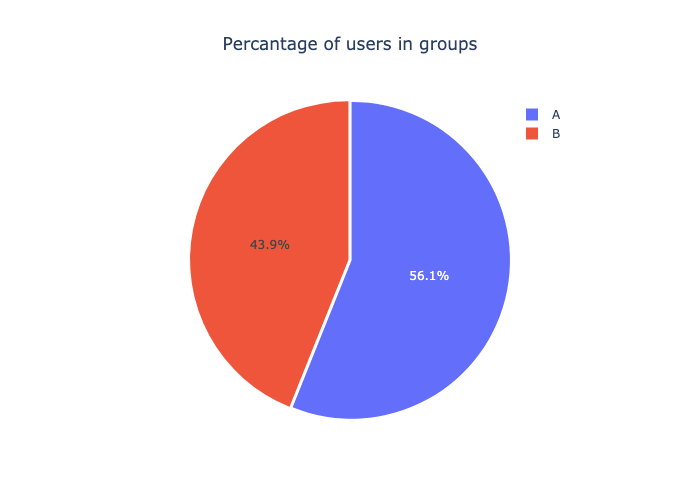

In [53]:
labels = our_test_viz['group']
values = our_test_viz['user_id']

fig_two_tests = go.Figure(data=(go.Pie(labels=labels, values=values, pull=0.01)))

fig_two_tests.update_layout(
    title='Percantage of users in groups',
    title_x=0.5,
    legend=dict(x=0.8, y=1)
)

fig_two_tests.show('png')

So, 783 users were in group "b" of the competing test, 344 (43.9%) of them fell into group "b" of our test. The users are distributed quite evenly in the percentage ratio.
We decided to leave these users in the dataset - the test results may be skewed, but we don't want to lose the power of the test by removing these users.

## Advertising campaigns

We know that the platform has conducted a number of marketing campaigns. Let's check if the test was running at the same dates as one of the advertising campaigns. We are only interested in advertising campaigns for European users.
To ensure that the advertising campaign does not overlap with the dates of the test:
- the advertising campaign must start later than the end of the test
- the advertising campaign must end before the start of the test

Let's check if there are any rows that do not fulfil these conditions.

In [54]:
marketing

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [55]:
eu_ads = marketing[marketing['regions'].str.contains('EU')]
eu_ads

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10


Let's see if there are advertising campaigns that do not satisfy the condition "the advertising campaign must start later than test ends"

In [56]:
eu_ads.query('~(start_dt > "2021-01-04")')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10


All advertising campaigns started before the end of the test. 

Let's see if there are any companies that do not fulfil the condition "advertising campaign must end before the start of the test".

In [57]:
eu_ads.query('~(finish_dt < "2020-12-07")')

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03


There is one advertising campaign that started after the test started and ended before the test started. Let's see if it influenced the test results. Let's construct a graph showing the distribution of events by day for both groups - group a and group b.

The `df_eu` dataframe does not contain information about events and event dates. It is necessary to attach the `user_actions` dataframe, which stores this information.

In [58]:
df_eu

,user_id,group,ab_test,first_date,region,device
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC
1,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone
2,DABC14FDDFADD29E,A,recommender_system_test,2020-12-08,EU,Mac
3,04988C5DF189632E,A,recommender_system_test,2020-12-14,EU,iPhone
4,482F14783456D21B,B,recommender_system_test,2020-12-14,EU,PC
...,...,...,...,...,...,...
6346,7C5C12FA1B5AB710,A,recommender_system_test,2020-12-21,EU,Android
6347,91C3969B8A72B908,B,recommender_system_test,2020-12-09,EU,Android
6348,E26F13A65CEAC6EA,A,recommender_system_test,2020-12-17,EU,Mac
6349,95401934D6D6D4FC,B,recommender_system_test,2020-12-13,EU,iPhone


In [59]:
df_eu_act = df_eu.merge(user_actions, on='user_id', how='left')
df_eu_act

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,0.00
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,0.00
...,...,...,...,...,...,...,...,...,...
26285,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:06,product_page,0.00
26286,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-20 20:01:34,product_page,0.00
26287,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-14 05:48:50,login,0.00
26288,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:03,login,0.00


In [60]:
df_eu_act.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26290 entries, 0 to 26289
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     26290 non-null  object        
 1   group       26290 non-null  object        
 2   ab_test     26290 non-null  object        
 3   first_date  26290 non-null  datetime64[ns]
 4   region      26290 non-null  object        
 5   device      26290 non-null  object        
 6   event_dt    23420 non-null  datetime64[ns]
 7   event_name  23420 non-null  object        
 8   details     23420 non-null  float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 2.0+ MB


In [61]:
df_eu_act['details'].isna().sum()

2870

There are gaps in the columns with information about events. These are users who have registered, but have not performed any actions after registration. We have 2870 such users. Let's check what percentage of users have not performed any actions after registration.

In [62]:
unactive_users = df_eu_act[pd.isna(df_eu_act['details'])]
print(len(unactive_users))

2870


In [63]:
print('{}% of new users did not take any action after registration'\
     .format(
    round(unactive_users['user_id'].nunique() / df_eu_act['user_id'].nunique() * 100)
))

print('{} - number of inactive users in the group "А"'\
     .format(unactive_users.query('group == "A"')['user_id'].nunique()))
print('{} - number of inactive users in the group "B"'\
     .format(unactive_users.query('group == "B"')['user_id'].nunique()))

45% of new users did not take any action after registration
1030 - number of inactive users in the group "А"
1840 - number of inactive users in the group "B"


In [64]:
print('There are {} more inactive users in group "B" than in group "A"'\
     .format((unactive_users.query('group == "B"')['user_id'].nunique() - \
             (unactive_users.query('group == "A"')['user_id'].nunique()))))

There are 810 more inactive users in group "B" than in group "A"


If we remove non-captive users from the dataset, it may affect the distribution of users across groups, as there are significantly more inactive users in group "B". It will also reduce the power of the test since we will remove a significant number of users - 2870.

On the other hand, we need to consider changing metrics such as:
- conversion to product card browsing
- basket browsing
- purchases

and also analyse the number of events per user. Conversion of users from registration to login is not mentioned in the ToR.

Let's note this fact and remove inactive users from the dataset. We will count the conversion rate only for those users who performed actions after registration.

In [65]:
df_eu_active = df_eu_act.dropna(subset=['details']).copy()
df_eu_active

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,0.00
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,0.00
...,...,...,...,...,...,...,...,...,...
26285,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:06,product_page,0.00
26286,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-20 20:01:34,product_page,0.00
26287,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-14 05:48:50,login,0.00
26288,80712ED4EA1B52A5,A,recommender_system_test,2020-12-14,EU,Android,2020-12-15 20:10:03,login,0.00


In [66]:
print('There are {} rows in the new data set'.format(len(df_eu_active)))
print('{} rows were deleted'.format(len(df_eu_act) - len(df_eu_active)))
print('There are {} test participants left in the test'.format(df_eu_active['user_id'].nunique()))

There are 23420 rows in the new data set
2870 rows were deleted
There are 3481 test participants left in the test


The `event_dt` column contains the time in addition to the event date. Let's create a new column `event_day`, where we round the values to the day.

In [67]:
df_eu_active['event_day'] = df_eu_active['event_dt'].dt.date
df_eu_active['event_day'] = pd.to_datetime(df_eu_active['event_day'])
df_eu_active.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23420 entries, 0 to 26289
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     23420 non-null  object        
 1   group       23420 non-null  object        
 2   ab_test     23420 non-null  object        
 3   first_date  23420 non-null  datetime64[ns]
 4   region      23420 non-null  object        
 5   device      23420 non-null  object        
 6   event_dt    23420 non-null  datetime64[ns]
 7   event_name  23420 non-null  object        
 8   details     23420 non-null  float64       
 9   event_day   23420 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), object(6)
memory usage: 2.0+ MB


In [68]:
ads_effect = df_eu_active.groupby(['event_day', 'group'])['event_name'].count().reset_index()
df_eu_active.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,event_day
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99,2020-12-07
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99,2020-12-25
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,0.00,2020-12-07
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,0.00,2020-12-25
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,0.00,2020-12-07


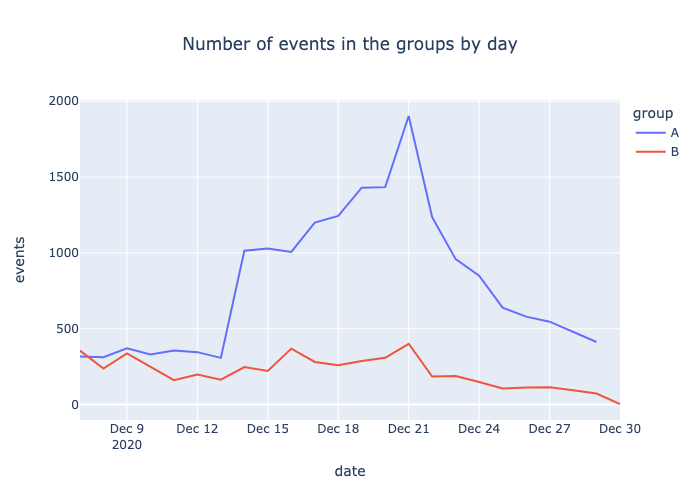

In [69]:
fig_ads = px.line(ads_effect, x='event_day', y='event_name', color='group',
                  title='Number of events in the groups by day',
                  labels={'event_day': 'date', 'event_name': 'events'})

fig_ads.update_layout(title_x=0.5)

fig_ads.show('png')

The advertising campaign "Christmas&New Year Promo" ran from 25 December to 3 January. On these dates no abnormal activity was observed in any of the groups. It can be concluded that the advertising campaign did not affect the results of the a/b test.

## Distribution of users into groups

### if inactive users are removed

Let's check how users are distributed into groups.

First, let's check if there are users in our test who fall into two groups at once.

In [70]:
df_eu_groups = df_eu.groupby('user_id')['group'].count().reset_index()
len(df_eu_groups.query('group > 1'))

0

There are no such users.

In [71]:
df_eu_distrib = df_eu_active.groupby('group')['user_id'].nunique().reset_index()
df_eu_distrib

,group,user_id
0,A,2604
1,B,877


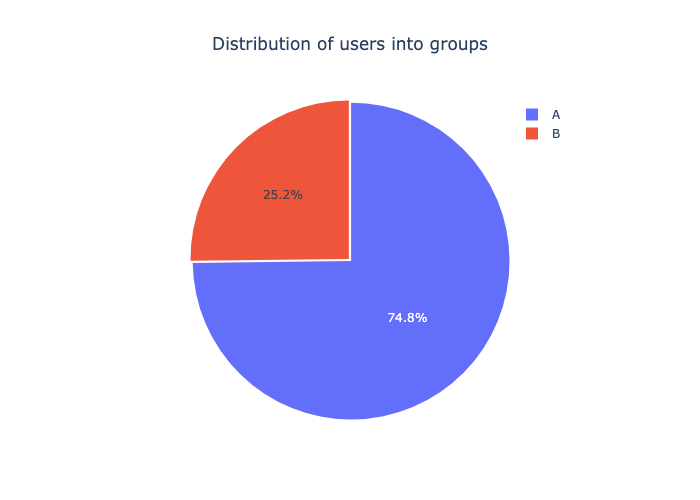

In [72]:
labels = df_eu_distrib['group']
values = df_eu_distrib['user_id']

fig_distr = go.Figure(data=(go.Pie(labels=labels, values=values, pull=0.01)))

fig_distr.update_layout(
    title='Distribution of users into groups',
    title_x=0.5,
    legend=dict(x=0.8, y=1)
)

fig_distr.show('png')

- 75% of users are in group A
- 25% - group B

### if we don't remove inactive users

In [73]:
df_eu_distrib_all = df_eu_act.groupby('group')['user_id'].nunique().reset_index()
df_eu_distrib_all

,group,user_id
0,A,3634
1,B,2717


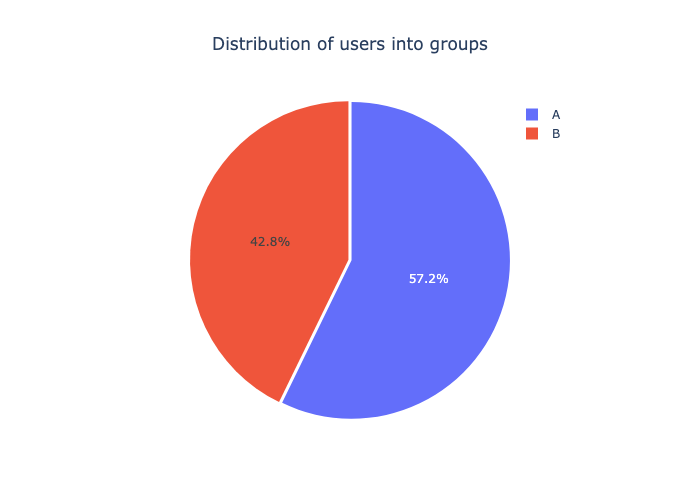

In [74]:
labels = df_eu_distrib_all['group']
values = df_eu_distrib_all['user_id']

fig_distr_all = go.Figure(data=(go.Pie(labels=labels, values=values, pull=0.01)))

fig_distr_all.update_layout(
    title='Distribution of users into groups',
    title_x=0.5,
    legend=dict(x=0.8, y=1)
)

fig_distr_all.show('png')

Provided the removal of inactive users loses mainly group "B", the distribution becomes uneven - 75% in group "A", 25% in group "B".

Nevertheless, as we mentioned above, we are mainly interested in post-login events.
For further analysis we will use the data from the `df_eu_active` dataset, from which the users who did not perform actions after login are removed.

## 14 days lifetime

According to the ToR, we are interested in metrics readings for 14 days from the date of registration. That is, we are not interested in all events that occurred after 14 days.

Let's create a new column `lifetime`, where we will calculate on which day after registration the event was committed.

In [75]:
df_eu_active['lifetime'] = (df_eu_active['event_day'] - df_eu_active['first_date']).dt.days
df_eu_active.head()

,user_id,group,ab_test,first_date,region,device,event_dt,event_name,details,event_day,lifetime
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99,2020-12-07,0
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99,2020-12-25,18
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,0.00,2020-12-07,0
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,0.00,2020-12-25,18
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,0.00,2020-12-07,0


In [76]:
df_eu_active['lifetime'].unique()

array([ 0, 18,  1,  5,  3, 10,  4,  6, 11,  8,  2, 16, 21,  7, 13,  9, 12,
       17, 19, 15, 14, 22, 20, 23])

Let's filter the dataset - leave only those rows where lifetime <= 14

In [77]:
df_eu_active = df_eu_active.query('lifetime <= 14')
df_eu_active['lifetime'].unique()

array([ 0,  1,  5,  3, 10,  4,  6, 11,  8,  2,  7, 13,  9, 12, 14])

In [78]:
len(df_eu_active)

22828

Let's take a look at how the events are spread out over the lifetime days.

In [79]:
lifetime = df_eu_active.groupby(['lifetime','group'])['event_name'].count().reset_index()
lifetime.head()

,lifetime,group,event_name
0,0,A,5892
1,0,B,1827
2,1,A,2817
3,1,B,742
4,2,A,1979


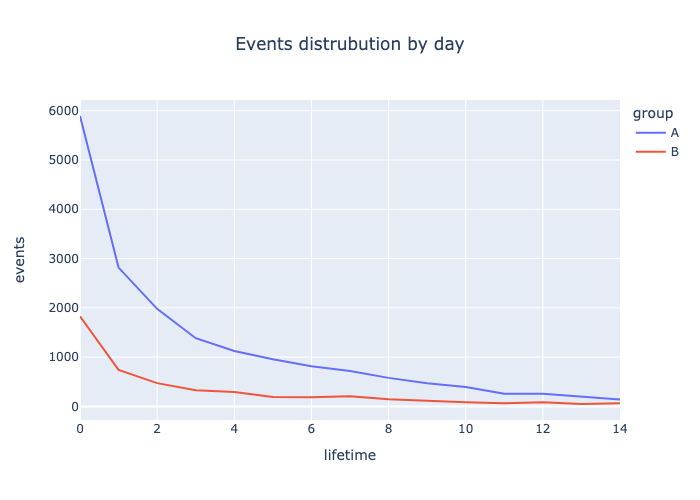

In [80]:
fig_life = px.line(lifetime, x='lifetime', y='event_name', color='group',
                   title='Events distrubution by day',
                   labels={'event_day': 'date', 'event_name': 'events'})
fig_life.update_layout(title_x=0.5)

fig_life.show('png')

We remember that our dataset is missing dates. We only have data on events up to 30 December. Most users commit events within 5 days of registration.

# Data Analysis

## events distribution in groups

In [81]:
gr_events = df_eu_active.groupby('group')['event_name'].count().reset_index()
gr_events

,group,event_name
0,A,17977
1,B,4851


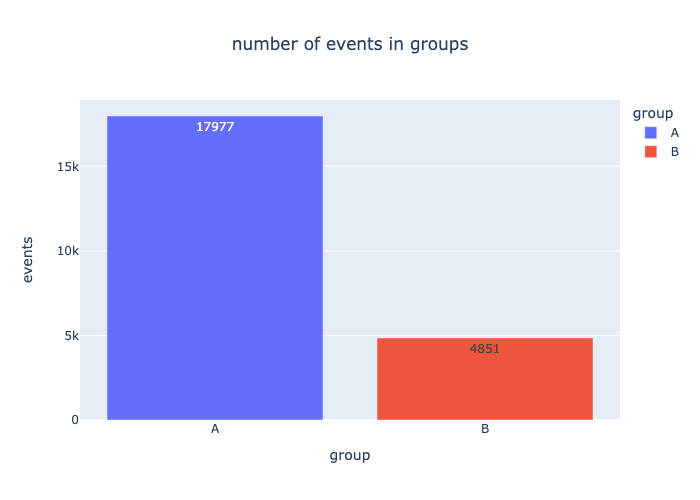

In [82]:
fig_events = px.bar(gr_events, x='group', y='event_name', color='group',
                   title='number of events in groups',
                   labels={'event_name': 'events'},
                   text='event_name')
fig_events.update_layout(title_x=0.5)
fig_events.show('png')

There are three times as many events in Group A. We remember that we have more users in group "A".

## number of events per user

check whether the number of events per user is equally distributed in the samples.

Let's visualise the distribution of the number of events per user.

In [83]:
events_count = df_eu_active.groupby(['group', 'user_id'])['event_name'].count()
events_count

group  user_id         
A      0010A1C096941592    12
       00341D8401F0F665     2
       003DF44D7589BBD4    15
       00505E15A9D81546     5
       006E3E4E232CE760     6
                           ..
B      FE76759FE6BF8C68    20
       FE8F9858BBE502D9     2
       FEA0C585A53E7027     3
       FF8CF7057415EB29     4
       FFF28D02B1EACBE1     9
Name: event_name, Length: 3481, dtype: int64

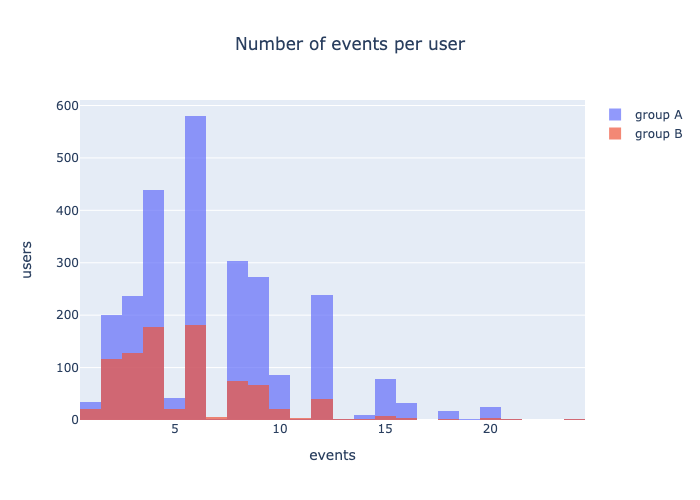

In [84]:
x0 = events_count['A']
x1 = events_count['B']

fig_events = go.Figure()
fig_events.add_trace(go.Histogram(
    x=x0,
    name='group A'))
fig_events.add_trace(go.Histogram(
    x=x1,
    name='group B'))

fig_events.update_layout(
    barmode='overlay',
    title_text='Number of events per user',
    title_x=0.5,
    xaxis_title_text='events',
    yaxis_title_text='users')

fig_events.update_traces(opacity=0.7)
fig_events.show('png')

Group A has more users. It is difficult to understand the distribution of absolute values.

Let's look at the distribution of relative values.

In [85]:
events_count = events_count.reset_index()
events_count = events_count.rename(columns={'event_name': 'events_cnt'})
events_count

,group,user_id,events_cnt
0,A,0010A1C096941592,12
1,A,00341D8401F0F665,2
2,A,003DF44D7589BBD4,15
3,A,00505E15A9D81546,5
4,A,006E3E4E232CE760,6
...,...,...,...
3476,B,FE76759FE6BF8C68,20
3477,B,FE8F9858BBE502D9,2
3478,B,FEA0C585A53E7027,3
3479,B,FF8CF7057415EB29,4


In [86]:
events_perc = events_count.groupby(['events_cnt', 'group'])['user_id'].count().reset_index()
events_perc = events_perc.rename(columns={'user_id': 'users_cnt'})
events_perc.head()

,events_cnt,group,users_cnt
0,1,A,35
1,1,B,21
2,2,A,201
3,2,B,117
4,3,A,236


In [87]:
group_totals = events_perc.groupby('group')['users_cnt'].sum()

events_perc['perc'] = events_perc.apply(lambda row: (row['users_cnt'] / group_totals[row['group']])\
                                                * 100, axis=1)

events_perc['perc'] = round(events_perc['perc'], 1) 
events_perc.head()

,events_cnt,group,users_cnt,perc
0,1,A,35,1.3
1,1,B,21,2.4
2,2,A,201,7.7
3,2,B,117,13.3
4,3,A,236,9.1


In [88]:
events_count = events_count.reset_index()
events_count.groupby('group')['events_cnt'].mean()

group
A    6.903610
B    5.531357
Name: events_cnt, dtype: float64

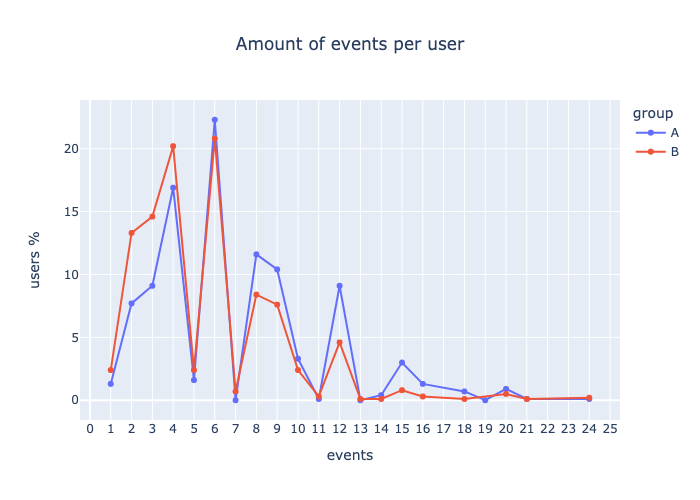

In [112]:
fig_events_perc = px.line(events_perc, x='events_cnt', y='perc', color='group', markers=True,
                         title='Amount of events per user',
                          labels={'events_cnt': 'events', 'perc': 'users %'}
                         )
fig_events_perc.update_layout(title_x=0.5)
fig_events_perc.update_xaxes(dtick=1)

fig_events_perc.show('png')

The distribution is quite synchronous. The difference is that in group B most of the users committed fewer events:
- 20% by 4 events and 6 events each
- 14.6% 3 events each
- 13.3% 2 events each

in group A, users on average committed more events:
- 22% by 6 events
- 17% 4 events
- only 9% for 3 events

This means that in group B users needed to take fewer steps to complete a purchase.

In group "A" users **on average** completed 7 events each. In group "B" users **on average** completed 6 events each.

In [90]:
event_type = df_eu_active.groupby(['event_day', 'event_name', 'group'])['user_id'].count().reset_index()
event_type.head()

,event_day,event_name,group,user_id
0,2020-12-07,login,A,148
1,2020-12-07,login,B,155
2,2020-12-07,product_cart,A,35
3,2020-12-07,product_cart,B,41
4,2020-12-07,product_page,A,92


In [91]:
event_type_a = event_type.query('group == "A"')
event_type_b = event_type.query('group == "B"')

In [92]:
fig_event_type_a = px.bar(
    event_type_a, x='event_day', y='user_id', color='event_name',
    title='Number of events per day in group A',
    labels={'event_day': 'date', 'event_name': 'event', 'user_id': 'events'}
)

fig_event_type_a.update_layout(title_x=0.5)

In [93]:
fig_event_type_b = px.bar(
    event_type_b, x='event_day', y='user_id', color='event_name',
    title='Number of events per day in group B',
    labels={'event_day': 'date', 'event_name': 'event', 'user_id': 'events'}
)

fig_event_type_b.update_layout(title_x=0.5)

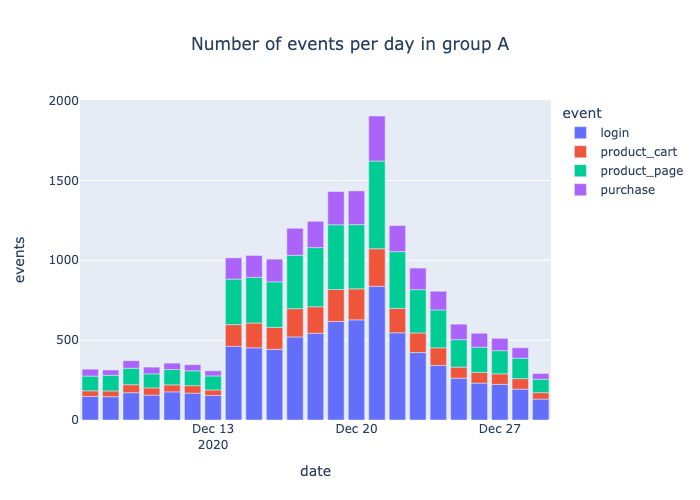

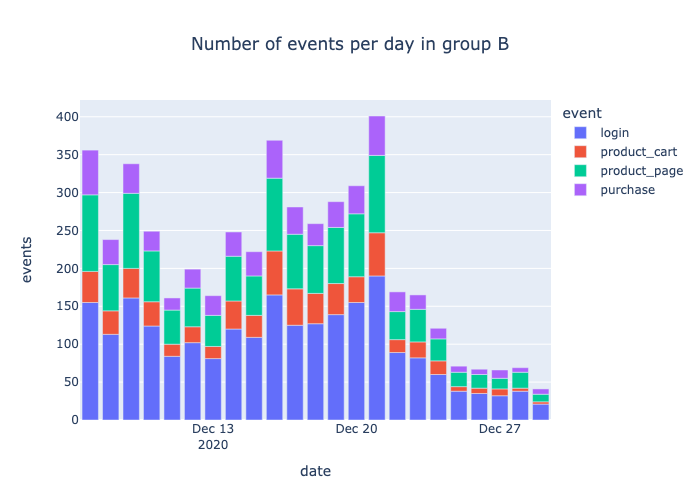

In [113]:
fig_event_type_a.show('png')
fig_event_type_b.show('png')

The distribution of events by day differs between groups. 

**Group "A "**. In group "A" low activity is observed till 13 December inclusive. Starting from 14 December the number of events more than doubles. The number of events reaches its peak on 21 December and then goes down.

**Group "B "**. In this group the activity is high, starting from the 1st day, 7th December. We observe peaks on 7, 9, 16 December, with absolute peak on 21 December (as in group "A"), after 21 December the number of events goes down.

## Number of registrations per day in groups

In [95]:
gr_reg = df_eu_active.groupby(['first_date', 'group'])['user_id'].nunique().reset_index()
gr_reg.head()

,first_date,group,user_id
0,2020-12-07,A,154
1,2020-12-07,B,171
2,2020-12-08,A,90
3,2020-12-08,B,42
4,2020-12-09,A,81


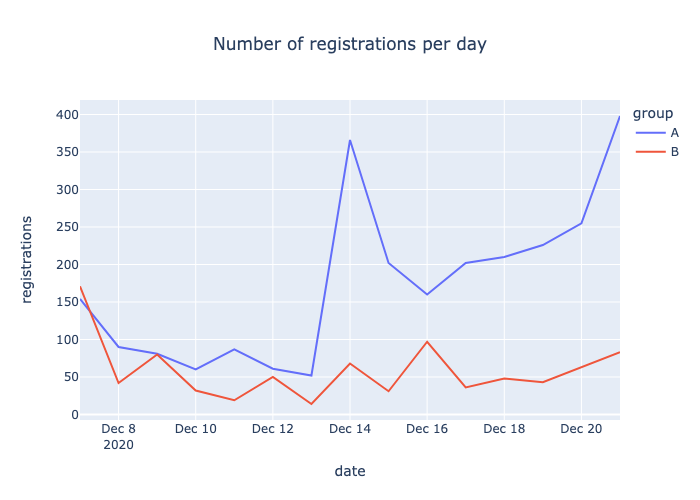

In [114]:
fig_reg = px.line(gr_reg, x='first_date', y='user_id', color='group',
                 title='Number of registrations per day',
                  labels={'first_date': 'date', 'user_id': 'registrations'})
fig_reg.update_layout(title_x=0.5)

fig_reg.show('png')

There are fewer registrations in group "B". There is a tendency to increase the number of registrations every second day.

In group "A" the number of registrations does not jump so much from day to day. There is a peak on 14 December - 355 users registered on this day - 7 times more than on 13 December.

## Devices

In [97]:
device = df_eu_active.groupby(['group', 'device'])['user_id'].nunique().reset_index()
device

,group,device,user_id
0,A,Android,1139
1,A,Mac,255
2,A,PC,689
3,A,iPhone,521
4,B,Android,405
5,B,Mac,74
6,B,PC,212
7,B,iPhone,186


In [98]:
device['perc'] = device.groupby('group')['user_id'].apply(lambda x: (x / x.sum()) * 100)
device['perc'] = round(device['perc'], 1)
device

/var/folders/87/638lt2v12_575j1ffp582p1m0000gp/T/ipykernel_5674/412164265.py:1: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



,group,device,user_id,perc
0,A,Android,1139,43.7
1,A,Mac,255,9.8
2,A,PC,689,26.5
3,A,iPhone,521,20.0
4,B,Android,405,46.2
5,B,Mac,74,8.4
6,B,PC,212,24.2
7,B,iPhone,186,21.2


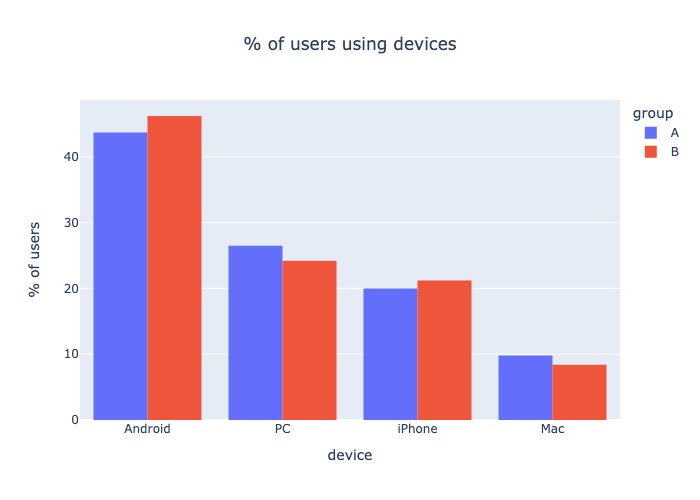

In [115]:
fig_device = px.histogram(
    device, x='device', y='perc', color='group', barmode='group',
    title='% of users using devices'
)

fig_device.update_layout(xaxis={'categoryorder': 'array', 'categoryarray': ['Android', 'PC', 'iPhone', 'Mac']},
                        title_x=0.5,
                        yaxis_title='% of users')

fig_device.show('png')

The distribution of users by devices is quite even. In both groups the popularity of devices is distributed equally. The most popular device is Andriod, the least popular is Mac. The difference in the percentage of users in the groups ranges from 1.2% to 2.5%

## average bill in groups

let's remember what unique values are stored in the `details` column with the purchase amount.

In [100]:
df_eu_active['details'].unique()

array([ 99.99,   0.  ,   4.99,   9.99, 499.99])

There are 5 values in total. Let's see how many users made a purchase of this or that amount, and then calculate the percentage of users to build a visualisation by relative values.

In [101]:
bill = df_eu_active.groupby(['details', 'group'])['user_id'].nunique().reset_index()
bill

,details,group,user_id
0,0.00,A,2604
1,0.00,B,876
2,4.99,A,782
3,4.99,B,235
4,9.99,A,317
5,9.99,B,75
6,99.99,A,201
7,99.99,B,45
8,499.99,A,44
9,499.99,B,12


In [102]:
bill['perc'] = bill.groupby('group')['user_id'].apply(lambda x: (x / x.sum()) * 100)
bill['perc'] = round(bill['perc'], 1)
bill

/var/folders/87/638lt2v12_575j1ffp582p1m0000gp/T/ipykernel_5674/3362877168.py:1: FutureWarning:

Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)



,details,group,user_id,perc
0,0.00,A,2604,66.0
1,0.00,B,876,70.5
2,4.99,A,782,19.8
3,4.99,B,235,18.9
4,9.99,A,317,8.0
5,9.99,B,75,6.0
6,99.99,A,201,5.1
7,99.99,B,45,3.6
8,499.99,A,44,1.1
9,499.99,B,12,1.0


Let's convert the data in the `details` column to text type, so that the histogram shows each column value separately

In [103]:
bill['details'] = bill['details'].astype(str)

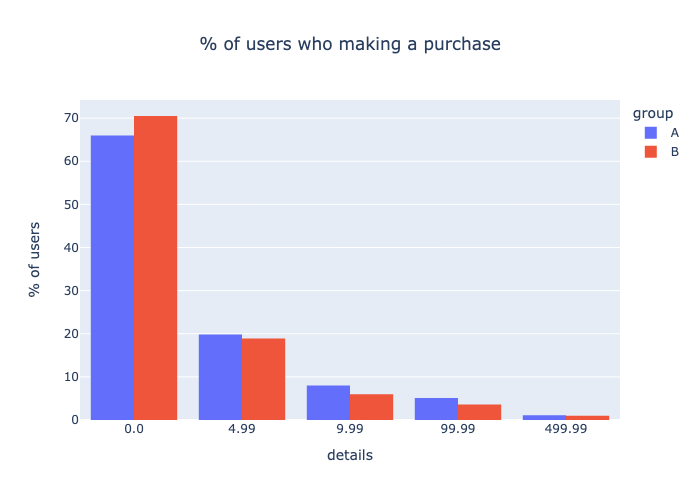

In [116]:
fig_bill = px.histogram(
    bill, x='details', y='perc', color='group', barmode='group',
    title='% of users who making a purchase'
)

fig_bill.update_layout(yaxis_title='% of users', title_x=0.5)

fig_bill.show('png')

In [105]:
print('Average bill in group A: {}'.format(round(df_eu_active.query('group == "A"')['details'].mean(), 2))) 
print('Average bill in group B: {}'.format(round(df_eu_active.query('group == "B"')['details'].mean(), 2)))
print('Difference - {}'.format(round(
    (df_eu_active.query('group == "A"')['details'].mean() - \
     (df_eu_active.query('group == "B"')['details'].mean())), 2)))

Average bill in group A: 3.21
Average bill in group B: 2.94
Difference - 0.27


We can see that Group B has fewer users who made a purchase overall. Group B has 4.5% more users who did not make a purchase. For each indicator in Group B, a smaller percentage of users made a purchase for a particular amount. The difference is not large, ranging from 2% to 0.1%

Which was reflected in the insignificant difference in the average cheque in the group.

## Event Funnel

Let's create a summary table where we calculate how many unique users made each event in each group.

In [106]:
vortex = df_eu_active.pivot_table(
    index=['group', 'event_name'],
    values='user_id',
    aggfunc='nunique'
).reset_index()

vortex

,group,event_name,user_id
0,A,login,2604
1,A,product_cart,782
2,A,product_page,1685
3,A,purchase,833
4,B,login,876
5,B,product_cart,244
6,B,product_page,493
7,B,purchase,249


let's set the order of rows in the tallbiz using logic:
1. login
2. viewing the product page
3. view basket
4. purchase

In [107]:
vortex_sort = vortex.reindex([0, 2, 1, 3, 4, 6, 5, 7])
vortex_sort

,group,event_name,user_id
0,A,login,2604
2,A,product_page,1685
1,A,product_cart,782
3,A,purchase,833
4,B,login,876
6,B,product_page,493
5,B,product_cart,244
7,B,purchase,249


In [108]:
va = vortex_sort.query('group == "A"')
vb = vortex_sort.query('group == "B"')

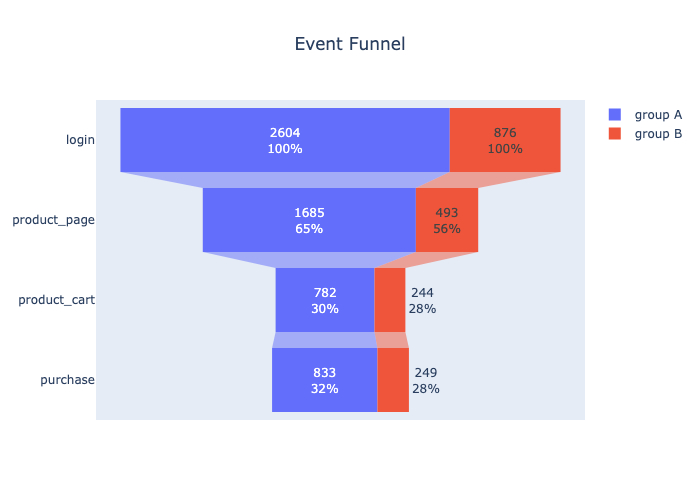

In [117]:
fig_v = go.Figure()

fig_v.add_trace(go.Funnel(
    name = 'group A',
    y=va['event_name'],
    x=va['user_id'],
    textinfo='value+percent initial'))

fig_v.add_trace(go.Funnel(
    name='group B',
    y=vb['event_name'],
    x=vb['user_id'],
    textinfo='value+percent initial'))

fig_v.update_layout(
    title='Event Funnel',
    title_x=0.5
)

fig_v.show('png')

1. payment is made more often than viewing the basket. The platform has implemented a "quick purchase" function, when you can make a payment without going to the basket.

2. it can be seen that **metrics have not improved**. Metrics in group "B" are worse at every step:
- product browsing - 9% worse
- basket browsing - 2% worse
- purchase - worse by 4%.

## data features

Let's summarise the data features that may have affected the results of the a-b test:

1. event data is incomplete - in the dataset with user activity data we only had records up to and including 30 December. We don't have data for 5 days - 31 to 4 January. This could have distorted the test results

2. two a-b tests were conducted on the platform at the same time

3. there are users who got into two tests at once - our test and the competing one, 44% (344 users) of these users got into the "B" group of our test.

4. the dates of the test coincided with the dates of the advertising campaign "Christmas & New Year Promo".

5. 45% of new users did not perform any actions after registration, we did not consider them for further analysis.

6. users are distributed unevenly among the groups - 75% in group A, 25% in group B

7. the test was conducted before and after the New Year. Customer behaviour at this time of year is very different from usual. 

# Evaluating results of the A/B test

for each step of the funnel, let's check the statistical difference of shares by the z-score

In [110]:
vortex_sort = vortex_sort.reset_index()
vortex_sort

,index,group,event_name,user_id
0,0,A,login,2604
1,2,A,product_page,1685
2,1,A,product_cart,782
3,3,A,purchase,833
4,4,B,login,876
5,6,B,product_page,493
6,5,B,product_cart,244
7,7,B,purchase,249


We use `proportions_ztest` to test the statistical difference of fractions.

Let's apply the test three times, for the funnel steps:
- login - product_page
- login - product_cart
- login - purchase

Let's take the value of alpha = 0.05. Since we are doing a multiple test, let's apply the Bonferroni correction and divide the statistical significance level by the number of tests performed: `0.05 / 3`.

Let's find out if there is a difference between the samples.

- null hypothesis: there is no significant difference between the shares
- alternative hypothesis: there is a significant difference between the shares

In [111]:
def run_ztest(data, steps, alpha):
    nobs = [data.at[0, 'user_id'], data.at[4, 'user_id']]
    
    # Словарь для связывания номеров шагов с названиями событий воронки
    event_names = {
        1: 'product_page',
        2: 'product_cart',
        3: 'purchase'
    }
    
    for step in steps:
        count = data.loc[[step, step + 4], 'user_id']
        stat, pval = proportions_ztest(count, nobs)
        print(count, nobs)
        
        print(f'Hypothesis testing for the equality of proportions for an event {event_names[step]}:')
        print(f'p_value: {pval}')
        
        if pval < alpha:
            print('Rejecting the null hypothesis: there is a significant difference between the proportions.\n')
        else:
            print('Failed to reject the null hypothesis: there is no evidence to consider the proportions as different.\n')

# Задаем параметры
alpha = 0.05 / 3
steps = [1, 2, 3]

# Вызываем функцию
run_ztest(vortex_sort, steps, alpha)

1    1685
5     493
Name: user_id, dtype: int64 [2604, 876]
Hypothesis testing for the equality of proportions for an event product_page:
p_value: 8.195976000351998e-06
Rejecting the null hypothesis: there is a significant difference between the proportions.

2    782
6    244
Name: user_id, dtype: int64 [2604, 876]
Hypothesis testing for the equality of proportions for an event product_cart:
p_value: 0.2215941567364419
Failed to reject the null hypothesis: there is no evidence to consider the proportions as different.

3    833
7    249
Name: user_id, dtype: int64 [2604, 876]
Hypothesis testing for the equality of proportions for an event purchase:
p_value: 0.0486476669504243
Failed to reject the null hypothesis: there is no evidence to consider the proportions as different.



The statistical test only showed differences at the "product page view" step.

We can come to the conclusion: **the enhanced recommendation system did not lead to improvements in the metrics - the test can be considered unsuccessful.**

# Overall conclusion

We conducted a study about A/B test: the correctness of the test and its results

We used data from 4 datasets:
- `ab_project_marketing_events.csv` - marketing events calendar for 2020.
- `final_ab_new_users.csv` - users who registered between 7 and 21 December 2020.
- `final_ab_events.csv` - actions of new users between 7 December 2020 and 4 January 2021.
- `final_ab_participants.csv` - table of test participants.

1. In the **pre-processing** stage of data processing, we checked: 
- the data type in each dataset and transformed the data to the correct type where necessary
- check datasets for gaps
- checked the datasets for duplicates. We found that there were users in the `participants` dataset who fell into more than one group and more than one test. We deferred the resolution of this issue to a later stage of the study.

2. **Correctness of test administration**. At this stage we investigated how correctly the test was conducted and whether it corresponded to the terms of reference
    
    1. we are checking the results of the `recommender_system_test` test. We found that the `final_ab_participants` dataset, which we copied into the `participants` variable, contains data about participants of another test as well. We have allocated the participants of the test we need into the `r_test` variable. We are left with 6701 unique users

    2. Dates. We found that we had extra data in the table with new users. We cut off users who registered after the 21st of December.
    
When we analysed the user activity data, we found that we only had data up to 30 December, while the test ended on 4 January. The user activity data is not complete.

    3. Audience. According to the TOR, the test should recruit 15% of new users from Europe. The expected number of test participants is 6000. Having made the test, we made sure that this condition was fulfilled

    4. Intersections - one user got into two groups or two tests
    
There are 1602 users who got into two tests - ours and the competing one.

Of these, 783 fell into group "B" of the competing test (12% of all users in our test). We verified that these users are evenly distributed in our test (439 in group A, 344 in group B), and decided to keep these users in the dataset and use their data for further analyses.

    5. Intersections with advertising campaigns
    
One advertising campaign (Christmas & New Year Promo) coincided with the dates of the test. The advertising campaign started on the 25th of December. After checking the users' activity on these days, we concluded that the users did not make more events on these days, hence there is no significant impact of the advertising campaign on the test.

    6. Inactive users
- 2870 (45%) users did not perform any actions after registration
- 1030 of them in group A
- 1840 in group B

We decided not to use the data on inactive users for further analysis, as it was important for us to calculate conversion rates by other metrics: viewing product cards, browsing the shopping cart, shopping.

The updated dataset remains:
- 23420 rows.
- 3481 test participants

    7. Uniformity of distribution of participants by groups

Active users are not evenly distributed across groups:
- 75% in group A - 2604 users
- 25% in group B - 877 users

3. data analysis

- There were 17977 events in group A
- In group B - 4851
        
    1. Number of events per user by day

The distribution is quite synchronous. The difference is that in group B most of the users committed fewer events:
- 20% by 4 events and 6 events each
- 14.6% 3 events
- 13.3% 2 events each

in group A, users on average committed more events:
- 22% by 6 events
- 17% 4 events
- only 9% for 3 events

This means that in group B users needed to take fewer steps to complete a purchase.
In group "A" users **on average** completed 7 events each. In group "B", they did 6 events each.

    2. Distribution of events by day by event type

**Group "A "**. In group "A" there is low activity up to and including 13 December. Starting from 14 December the number of events more than doubles. The number of events reaches a peak on 21 December and then declines.

**Group "B "**. In this group the activity is high, starting from the 1st day, 7th December. We observe peaks on 7, 9, 16 December, with absolute peak on 21 December (as in group "A"), after 21 December the number of events goes down.

    3. Number of registrations per day in groups

There are fewer registrations in group "B". There is a tendency to increase the number of registrations every second day.

In group "A" the number of registrations does not jump so much from day to day. There is a peak on the 14th of December - 355 users registered on this day - 7 times more than on the 13th of December.

    4. Distribution by devices

The distribution of users by device is fairly even. In both groups the popularity of devices is distributed equally. The most popular device is Andriod, the least popular is Mac. The difference in the percentage of users in the groups ranges from 1.2% to 2.5%

    5. Average cheque in the groups

- Average cheque in group A - 3.21
- Average cheque in group B - 2.94
- The difference is 0.27

Group B has fewer users who made a purchase overall. Group B has 4.5% more users who did not make a purchase. For each metric in Group B, a smaller percentage of users made a purchase of some amount. The difference is not large, ranging from 2% to 0.1%. Which was reflected in the insignificant difference in the average cheque in the group.

    6. Event funnel

- Payment is made more often than basket browsing. The platform has implemented a "quick purchase" feature where payment can be made without going to the basket.
- It can be seen that **metrics have not improved**. Metrics in group "B" are worse at every step:
    - product browsing - 9% worse
    - browsing the basket - 2% worse
    - purchase - worse by 4%.

    7. data features that may have affected the results of the a-b test:
        - event data is incomplete - in the dataset with user action data, we only had records up to and including 30 December. We do not have data for 5 days - 31 to 4 January. This could have skewed the test results
        - two a-b tests were conducted on the platform at the same time. there are users who were included in two tests at once - ours and the competing one, 44% (344 users) of these users were included in group "B" of our test.
        - the dates of the test coincided with the dates of the "Christmas & New Year Promo" advertising campaign.
        - 45% of new users did not perform any actions after registration, we did not consider them for further analysis.
        - users are unevenly distributed among the groups - 75% in group A, 25% in group B.
        - the test was conducted before and after the New Year. Customer behaviour at this time of year is very different from usual.

4- Evaluating the results of the A-B test
 
For each step of the funnel, we tested the statistical difference of proportions by z-test

We used proportions_ztest to test the statistical difference of the fractions.

Let's apply the test three times, for the funnel steps:
- login - product_page
- login - product_cart
- login - purchase

alpha = 0.05. Since we are doing a multiple test, we apply the Bonferroni correction and divide the statistical significance level by the number of tests performed: 0.05 / 3.

Let's find out if there is a difference between the samples:
- null hypothesis: there is no significant difference between the shares
- alternative hypothesis: there is a significant difference between the shares.

Testing the hypothesis of equality of shares for the product_page event:
- p_value: 8.195976000351998e-06
- Reject the null hypothesis: there is a significant difference between the shares

Testing the hypothesis of equality of shares for the event product_cart:
- p_value: 0.2215941567364419
- Failed to refute the null hypothesis: there is no reason to consider the shares to be different

Testing the hypothesis of equality of shares for the event purchase:
- p_value: 0.0486476669504243
- Failed to refute the null hypothesis: no reason to consider the shares different

The statistical test showed differences only at the "view product page" step.

**Conclusion about the results of the A/B test: the new recommendation system did not lead to an improvement of the metrics.**

As we mentioned earlier, there are a number of factors that may have affected the conduct and results of the test. One of the main factors is the lack of complete data on user actions. It is possible to check the success of the test again if it is possible to access complete user activity data.

Another important factor is the timing of the test. The test started on 7 December, just before Christmas. Shopping activity increases strongly during these days. The fact that the metrics didn't improve in group B is rather in favour of the new recommendation system being ineffective. If it did not work during the peak shopping season, the likelihood that it will work during other seasons is very low. 

Recommendation: re-run the test as the test was stopped 5 days early and there is a possibility that there was a "peeking problem".